In [1]:

import sys
sys.path.append('.')

import pandas as pd
from utils.data import load_all_parquets
from utils.charts import *

# Charger toutes les données 
data_path = "data/processed"
df = load_all_parquets(data_path)

# Vérifier les premières lignes
df.head()


,address,latitude,longitude,score,city,postcode,citycode,commune,population,fetched_at
0,Paris,48.859000,2.347000,0.970297,paris,75001,75056,paris,2113705,2025-12-17 13:59:48.219553
1,Lyon,45.758000,4.835000,0.963929,lyon,69001,69123,lyon,520774,2025-12-17 13:59:49.455593
2,Toulouse,43.604082,1.433805,0.963849,toulouse,31000,31555,toulouse,511684,2025-12-17 13:59:50.688519
3,Nice,43.712730,7.250920,0.962171,nice,06000,06088,nice,353701,2025-12-17 13:59:51.876825
4,Strasbourg,48.579831,7.761454,0.961295,strasbourg,67000,67482,strasbourg,291709,2025-12-17 13:59:53.134190


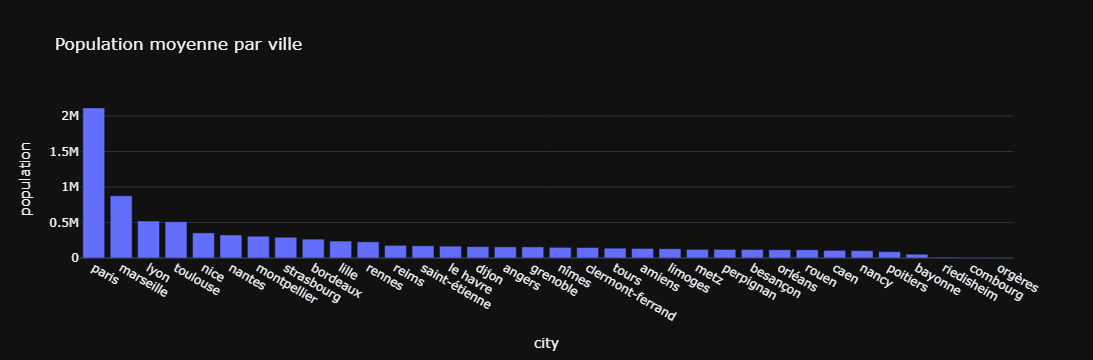

In [2]:
# Agrégation population moyenne par ville
agg = df.groupby("city", as_index=False)["population"].mean().sort_values("population", ascending=False)

# Créer le bar chart
fig = create_bar_chart(
    agg,
    x="city",
    y="population",
    title="Population moyenne par ville"
)

fig.show()


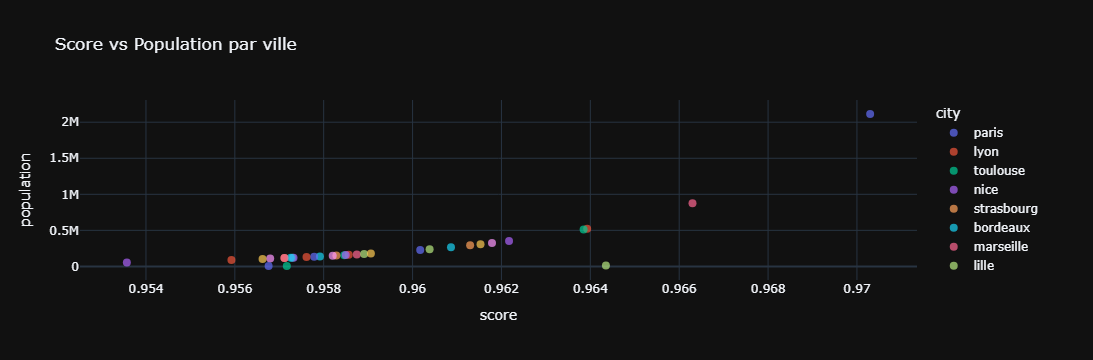

In [3]:
# Exemple : score vs population
fig = create_scatter_plot(
    df,
    x="score",
    y="population",
    color="city",  # ou None si trop de villes
    title="Score vs Population par ville"
)
fig.show()


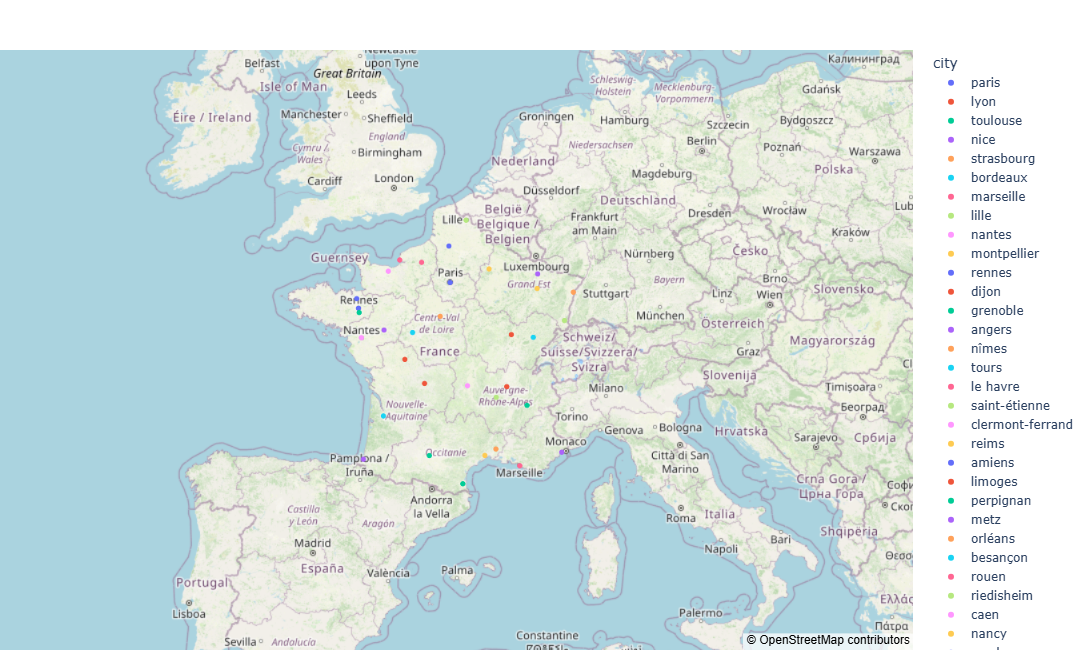

In [4]:
fig = create_geo_map(df)
fig.show()


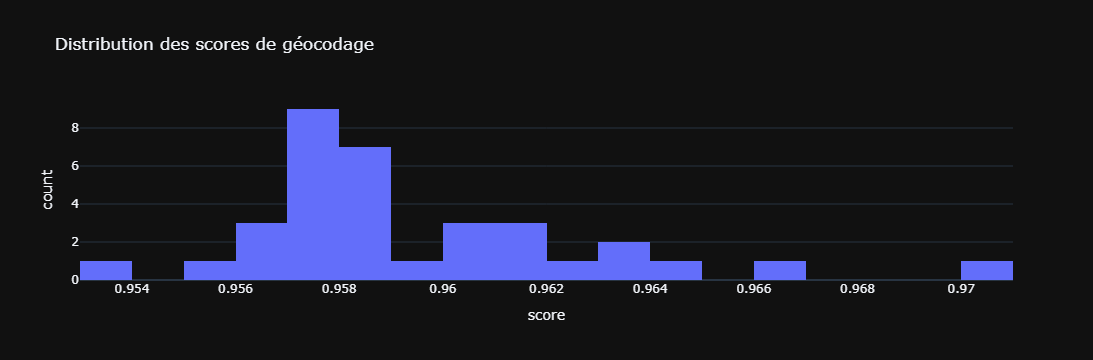

In [5]:
fig = create_histogram(
    df,
    x="score",   # ou "population"
    nbins=20,
    title="Distribution des scores de géocodage"
)
fig.show()


test pour le chatbot avec ollama

In [6]:
from utils.chatbot import DataChatbot

chatbot = DataChatbot(df)
response = chatbot.chat("Quelles sont les villes les plus peuplées ?")
print(response)


Les villes les plus peuplées peuvent être déterminées en examinant la colonne 'population'. Voici les 5 premières villes par ordre décroissant de population :

- Paris : 2 113 705
- Toulouse : 511 684
- Lyon : 520 774
- Nice : 353 701
- Strasbourg : 291 709

Ces chiffres suggèrent que la plupart des villes étudiées sont considérablement plus peuplées que Paris, qui est l'une des moins peuplées de cette liste.
